The original dataset is from here:
https://www.kaggle.com/datasets/andrewmvd/okcupid-profiles?resource=download&select=okcupid_profiles.csv

I used a Virtual Machine to this analysis.

In [176]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [177]:
#import the csv file into a dataframe
df=pd.read_csv('/home/ubuntu/host/okcupid_profiles.csv', delimiter= ',')


In [178]:
#checking the number of all rows and columns
df.shape

(59946, 31)

In [179]:
#checking if there are missing values and the data types
#-->we have missing values that we have to fill & 'height' needs to convert to int
#-->
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

In [180]:
#scanning the first 5 rows of the dataset
df.head()


,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


In [181]:
#for the analysis we won't need the essay columns -->get rid of them
df.drop(['essay0','essay1','essay2','essay3','essay4','essay5','essay6','essay7','essay8','essay9'], axis='columns', inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

First, we have to fill the NULL values, based on the column's other values.
For this, I checked the unique values in each relevant columns, then filled the NULL values with relevant data.
The string-type columns I filled with the value 'unknown', the 'height' column filled with the average of height values

In [182]:
df['height'].unique()

array([75., 70., 68., 71., 66., 67., 65., 72., 62., 64., 69., 73., 74.,
       60., 63., 76., 61., 78., 79., 59., 80., 91., 83., 77., 58., 56.,
       95., 57., 87., 81., 36., 43., 52., 55., 53., 93.,  8., 54., 82.,
        3., 86., 42., 84., 94., 50.,  6., 47., 49., 48., 90., 88., nan,
       37.,  9., 51.,  1., 92., 26., 85., 89.,  4.])

In [183]:
df['height'] = df.height.fillna(df['height'].mean())

In [184]:
df['body_type'].unique()

array(['a little extra', 'average', 'thin', 'athletic', 'fit', nan,
       'skinny', 'curvy', 'full figured', 'jacked', 'rather not say',
       'used up', 'overweight'], dtype=object)

In [185]:
df['diet'].unique()

array(['strictly anything', 'mostly other', 'anything', 'vegetarian', nan,
       'mostly anything', 'mostly vegetarian', 'strictly vegan',
       'strictly vegetarian', 'mostly vegan', 'strictly other',
       'mostly halal', 'other', 'vegan', 'mostly kosher',
       'strictly halal', 'halal', 'strictly kosher', 'kosher'],
      dtype=object)

In [186]:
df['drinks'].unique()

array(['socially', 'often', 'not at all', 'rarely', nan, 'very often',
       'desperately'], dtype=object)

In [187]:
df['drugs'].unique()

array(['never', 'sometimes', nan, 'often'], dtype=object)

In [188]:
df['education'].unique()

array(['working on college/university', 'working on space camp',
       'graduated from masters program',
       'graduated from college/university', 'working on two-year college',
       nan, 'graduated from high school', 'working on masters program',
       'graduated from space camp', 'college/university',
       'dropped out of space camp', 'graduated from ph.d program',
       'graduated from law school', 'working on ph.d program',
       'two-year college', 'graduated from two-year college',
       'working on med school', 'dropped out of college/university',
       'space camp', 'graduated from med school',
       'dropped out of high school', 'working on high school',
       'masters program', 'dropped out of ph.d program',
       'dropped out of two-year college', 'dropped out of med school',
       'high school', 'working on law school', 'law school',
       'dropped out of masters program', 'ph.d program',
       'dropped out of law school', 'med school'], dtype=object)

In [189]:
df['ethnicity'].unique()

array(['asian, white', 'white', nan, 'asian, black, other',
       'white, other', 'hispanic / latin, white', 'hispanic / latin',
       'pacific islander, white', 'asian', 'black, white',
       'pacific islander', 'asian, native american',
       'asian, pacific islander', 'black, native american, white',
       'middle eastern, other', 'native american, white', 'indian',
       'black', 'black, native american, hispanic / latin, other',
       'black, native american, hispanic / latin',
       'asian, black, pacific islander',
       'asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin, white, other',
       'other', 'hispanic / latin, other', 'asian, black',
       'middle eastern, white', 'native american, white, other',
       'black, native american', 'black, white, other',
       'hispanic / latin, white, other', 'middle eastern', 'black, other',
       'native american, hispanic / latin, white', 'black, indian',
       'indian, white, othe

In [190]:
df['job'].unique()

array(['transportation', 'hospitality / travel', nan, 'student',
       'artistic / musical / writer', 'computer / hardware / software',
       'banking / financial / real estate', 'entertainment / media',
       'sales / marketing / biz dev', 'other', 'medicine / health',
       'science / tech / engineering', 'executive / management',
       'education / academia', 'clerical / administrative',
       'construction / craftsmanship', 'rather not say',
       'political / government', 'law / legal services', 'unemployed',
       'military', 'retired'], dtype=object)

In [191]:
df['offspring'].unique()

array(["doesn't have kids, but might want them", nan, "doesn't want kids",
       "doesn't have kids, but wants them", "doesn't have kids",
       'wants kids', 'has a kid', 'has kids',
       "doesn't have kids, and doesn't want any",
       "has kids, but doesn't want more",
       "has a kid, but doesn't want more", 'has a kid, and wants more',
       'has kids, and might want more', 'might want kids',
       'has a kid, and might want more', 'has kids, and wants more'],
      dtype=object)

In [192]:
df['pets'].unique()

array(['likes dogs and likes cats', 'has cats', 'likes cats', nan,
       'has dogs and likes cats', 'likes dogs and has cats',
       'likes dogs and dislikes cats', 'has dogs',
       'has dogs and dislikes cats', 'likes dogs',
       'has dogs and has cats', 'dislikes dogs and has cats',
       'dislikes dogs and dislikes cats', 'dislikes cats',
       'dislikes dogs and likes cats', 'dislikes dogs'], dtype=object)

In [193]:
df['religion'].unique()

array(['agnosticism and very serious about it',
       'agnosticism but not too serious about it', nan, 'atheism',
       'christianity', 'christianity but not too serious about it',
       'atheism and laughing about it',
       'christianity and very serious about it', 'other', 'catholicism',
       'catholicism but not too serious about it',
       'catholicism and somewhat serious about it',
       'agnosticism and somewhat serious about it',
       'catholicism and laughing about it',
       'agnosticism and laughing about it', 'agnosticism',
       'atheism and somewhat serious about it',
       'buddhism but not too serious about it',
       'other but not too serious about it', 'buddhism',
       'other and laughing about it',
       'judaism but not too serious about it',
       'buddhism and laughing about it',
       'other and somewhat serious about it',
       'other and very serious about it',
       'hinduism but not too serious about it',
       'atheism but not too ser

In [194]:
df['sign'].unique()

array(['gemini', 'cancer', 'pisces but it doesn&rsquo;t matter', 'pisces',
       'aquarius', 'taurus', 'virgo', 'sagittarius',
       'gemini but it doesn&rsquo;t matter',
       'cancer but it doesn&rsquo;t matter',
       'leo but it doesn&rsquo;t matter', nan,
       'aquarius but it doesn&rsquo;t matter',
       'aries and it&rsquo;s fun to think about',
       'libra but it doesn&rsquo;t matter',
       'pisces and it&rsquo;s fun to think about', 'libra',
       'taurus but it doesn&rsquo;t matter',
       'sagittarius but it doesn&rsquo;t matter',
       'scorpio and it matters a lot',
       'gemini and it&rsquo;s fun to think about',
       'leo and it&rsquo;s fun to think about',
       'cancer and it&rsquo;s fun to think about',
       'libra and it&rsquo;s fun to think about',
       'aquarius and it&rsquo;s fun to think about',
       'virgo but it doesn&rsquo;t matter',
       'scorpio and it&rsquo;s fun to think about',
       'capricorn but it doesn&rsquo;t matter', 'sc

In [195]:
df['smokes'].unique()

array(['sometimes', 'no', nan, 'when drinking', 'yes', 'trying to quit'],
      dtype=object)

In [196]:
df['speaks'].unique()

array(['english', 'english (fluently), spanish (poorly), french (poorly)',
       'english, french, c++', ...,
       'english (fluently), hindi (poorly), french (poorly), tamil (okay), spanish (poorly)',
       'english (fluently), french (poorly), japanese (poorly), latin (poorly)',
       'english (fluently), french, farsi'], dtype=object)

In [197]:
df['diet'] = df.diet.fillna('unknown')
df['diet'] = df.diet.fillna('unknown')
df['drinks'] = df.drinks.fillna('unknown')
df['drugs'] = df.drugs.fillna('unknown')
df['education'] = df.education.fillna('unknown')
df['ethnicity'] = df.ethnicity.fillna('unknown')
df['job'] = df.job.fillna('unknown')
df['offspring'] = df.offspring.fillna('unknown')
df['pets'] = df.pets.fillna('unknown')
df['religion'] = df.religion.fillna('unknown')
df['sign'] = df.sign.fillna('unknown')
df['smokes'] = df.smokes.fillna('unknown')
df['speaks'] = df.speaks.fillna('unknown')

In [198]:
#another issue in the 'sign' column to change from 'doesn&rsquo;t' to 'doesn't' and from 'it&rsquo;s' to 'it's'
df['sign'] = df['sign'].str.replace ('&rsquo;', "'")
print(df['sign'])

0                                    gemini
1                                    cancer
2              pisces but it doesn't matter
3                                    pisces
4                                  aquarius
                        ...                
59941    cancer and it's fun to think about
59942             leo but it doesn't matter
59943     sagittarius but it doesn't matter
59944       leo and it's fun to think about
59945    gemini and it's fun to think about
Name: sign, Length: 59946, dtype: object


In [199]:
#let's convert the height column into integer
df["height"] = df['height'].astype('int')
df.dtypes

age             int64
status         object
sex            object
orientation    object
body_type      object
diet           object
drinks         object
drugs          object
education      object
ethnicity      object
height          int64
income          int64
job            object
last_online    object
location       object
offspring      object
pets           object
religion       object
sign           object
smokes         object
speaks         object
dtype: object

In [200]:
#quick overview of the cleaned data
df.describe(include='all')

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks
count,59946.000000,59946,59946,59946,54650,59946,59946,59946,59946,59946,...,59946.000000,59946,59946,59946,59946,59946,59946,59946,59946,59946
unique,NaN,5,2,3,12,19,7,4,33,218,...,NaN,22,30123,199,16,16,46,49,6,7648
top,NaN,single,m,straight,average,unknown,socially,never,graduated from college/university,white,...,NaN,unknown,2012-06-29-22-56,"san francisco, california",unknown,unknown,unknown,unknown,no,english
freq,NaN,55697,35829,51606,14652,24395,41780,37724,23959,32831,...,NaN,8198,24,31064,35561,19921,20226,11056,43896,21828
mean,32.340290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20033.222534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.452779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97346.192104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [201]:
#quick overview just from the int columns
df[['age','height', 'income']].describe()

,age,height,income
count,59946.000000,59946.000000,59946.000000
mean,32.340290,68.295266,20033.222534
std,9.452779,3.994704,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


Exploring the data, making insights

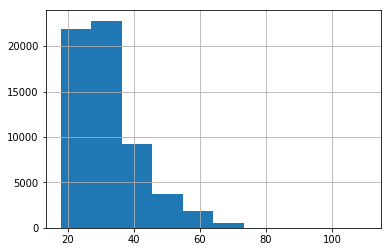

In [225]:
df['age'].hist()